In [1]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import pandas as pd
import matplotlib as plt

import seaborn as sns


import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

import random


In [3]:
df_gpt = pd.read_csv("data_gpt.csv")
print(df_gpt.shape)

(10867, 47)


In [4]:
df_gpt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10867 entries, 0 to 10866
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Submitted at                10867 non-null  object 
 1   Intro                       10867 non-null  object 
 2   Basic personal amount (1)   3140 non-null   object 
 3   region                      3033 non-null   object 
 4   Basic personal amount       3515 non-null   object 
 5   Self-employed: not sure     12 non-null     object 
 6   Self-employed               2334 non-null   object 
 7   Income: yes                 1134 non-null   object 
 8   Offramp: info               1114 non-null   object 
 9   Info offramp: rich          913 non-null    object 
 10  CVIPT > NETFILE             156 non-null    object 
 11  Final question              1065 non-null   object 
 12  Feedback                    1409 non-null   object 
 13  questionTax                 609

In [5]:
df_gpt1  = df_gpt[['questionTax', 'answerTax']]

In [6]:
df_gpt2 = df_gpt[['questionTax2', 'answerTax2']]
df_gpt2.rename(columns={'questionTax2': 'questionTax'}, inplace=True)
df_gpt2.rename(columns={'answerTax2': 'answerTax'}, inplace=True)




<ipython-input-6-d22233beb974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt2.rename(columns={'questionTax2': 'questionTax'}, inplace=True)
<ipython-input-6-d22233beb974>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt2.rename(columns={'answerTax2': 'answerTax'}, inplace=True)


In [7]:
df_gpt3 = df_gpt[['questionTax3', 'answerTax3']]
df_gpt3.rename(columns={'questionTax3': 'questionTax'}, inplace=True)
df_gpt3.rename(columns={'answerTax3': 'answerTax'}, inplace=True)



<ipython-input-7-1387c691a7c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt3.rename(columns={'questionTax3': 'questionTax'}, inplace=True)
<ipython-input-7-1387c691a7c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt3.rename(columns={'answerTax3': 'answerTax'}, inplace=True)


In [8]:
df_gpt4 = df_gpt[['questionTax4', 'answerTax4']]

df_gpt4.rename(columns={'questionTax4': 'questionTax'}, inplace=True)
df_gpt4.rename(columns={'answerTax4': 'answerTax'}, inplace=True)




<ipython-input-8-f571dda0ae50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt4.rename(columns={'questionTax4': 'questionTax'}, inplace=True)
<ipython-input-8-f571dda0ae50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt4.rename(columns={'answerTax4': 'answerTax'}, inplace=True)


In [9]:
df_gpt5 = df_gpt[['questionTax5', 'answerTax5']]

df_gpt5.rename(columns={'questionTax5': 'questionTax'}, inplace=True)
df_gpt5.rename(columns={'answerTax5': 'answerTax'}, inplace=True)




<ipython-input-9-6110a1745520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt5.rename(columns={'questionTax5': 'questionTax'}, inplace=True)
<ipython-input-9-6110a1745520>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt5.rename(columns={'answerTax5': 'answerTax'}, inplace=True)


In [10]:
# Concatenate the DataFrames vertically
frames = [df_gpt1, df_gpt2, df_gpt3, df_gpt4, df_gpt5]
df_final = pd.concat(frames)


In [11]:
df_final.head()

,questionTax,answerTax
0,NaN,NaN
1,NaN,NaN
2,I died in 2021,"I'm sorry to hear that. In this case, your fil..."
3,How to fine as sole proprietor,"As a sole proprietor in Canada, you are requir..."
4,NaN,NaN


In [12]:
df_final.shape

(54335, 2)

In [13]:
#removing Nan Values

nan_values_question_tax = df_final['questionTax'].isnull().sum()
nan_values_answer_tax = df_final['answerTax'].isnull().sum()

print(f"NaN values in 'questionTax': {nan_values_question_tax}")

print(f"NaN values in 'answerTax': {nan_values_answer_tax}")

NaN values in 'questionTax': 43540
NaN values in 'answerTax': 43562


In [14]:
# Remove a specific column with NaN values
#Even for blank question, there is a default answer to type question
column_name_with_nans = 'answerTax'  # Replace 'Your_Column_Name' with the column containing NaN values

df_final = df_final.dropna(subset=[column_name_with_nans])

# Check the resulting DataFrame after removing the column
print(df_final)

                                             questionTax  \
2                                         I died in 2021   
3                        How to fine as sole proprietor    
6              who is eligible for care giver benefits\n   
7                    Where to claim self employment ink?   
9                             Can I write off hookers?\n   
...                                                  ...   
10823  I bought a new house that I moved into in Dece...   
10824  WEALTHSIMPLE tax indicates that I have 250$ in...   
10840                             Credits in Nova Scotia   
10846  can you file your property taxes on your prima...   
10848  Do i enter my Exchange Traded Securities Commi...   

                                               answerTax  
2      I'm sorry to hear that. In this case, your fil...  
3      As a sole proprietor in Canada, you are requir...  
6      If you live in Canada and are a caregiver for ...  
7      As a self-employed individual in Can

PRE PROCESSING

In [15]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_punctuation, strip_multiple_whitespaces
from nltk.stem import WordNetLemmatizer
from gensim.parsing.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import string
import nltk
import matplotlib.pyplot as plt


# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Example preprocess function
def preprocess_text(text):
    # Convert to lowercase and remove numeric and special characters
    custom_filters = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces]
    tokens = [token for token in simple_preprocess(text) if token not in STOPWORDS and len(token) > 2]

    # Filter out stopwords, short tokens, and non-vocabulary words
    tokens = [WordNetLemmatizer().lemmatize(token, pos='v') for token in tokens if token not in STOPWORDS and len(token) > 2]

    return tokens

# Apply enhanced preprocessing to your DataFrame's 'questions' column
df_final['clean_questions'] = df_final['questionTax'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


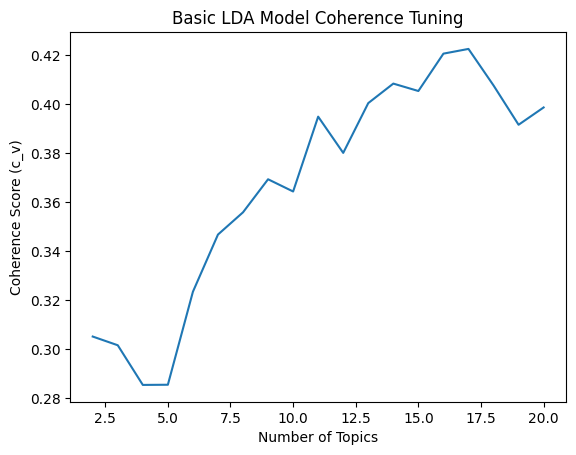

In [16]:
#Basic LDA MODEL

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df_final['clean_questions'], vector_size=300, window=5, min_count=1, workers=4)

# Create dictionary and corpus
dictionary = Dictionary(df_final['clean_questions'])
corpus = [dictionary.doc2bow(doc) for doc in df_final['clean_questions']]

# Fine-tune LDA hyperparameters
coherence_scores_lda = []
for num_topics in range(2, 21):
    lda_model = LdaModel(
        corpus,
        num_topics=num_topics,
        id2word=dictionary,
        passes=20,
        alpha='auto',
        eta='auto',
        iterations=200,
        chunksize=100,
        minimum_probability=0.001
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=df_final['clean_questions'],
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores_lda.append(coherence_model.get_coherence())

# Plot coherence scores for different numbers of topics
plt.plot(range(2, 21), coherence_scores_lda)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Basic LDA Model Coherence Tuning")
plt.show()

In [17]:
#Determining the optimal number of topics for an LDA (Latent Dirichlet Allocation) model is a crucial step in topic modeling.

In [18]:
#LDA Model
#no_of_topics = 16, has highest amout of coherence(0.44)

# Find the optimal number of topics
optimal_num_topics_lda = range(2, 21)[coherence_scores_lda.index(max(coherence_scores_lda))]
print(f"Optimal number of topics: {optimal_num_topics_lda}")




Optimal number of topics: 17


In [19]:
print(f"Highest coherence score: {max(coherence_scores_lda)}")

Highest coherence score: 0.4224860984242117


On the first basic Attempt of LDA modelling we recieved a Coherent score around 0.43. Now trying different models such as NFM and LSA

LSA topic Model:

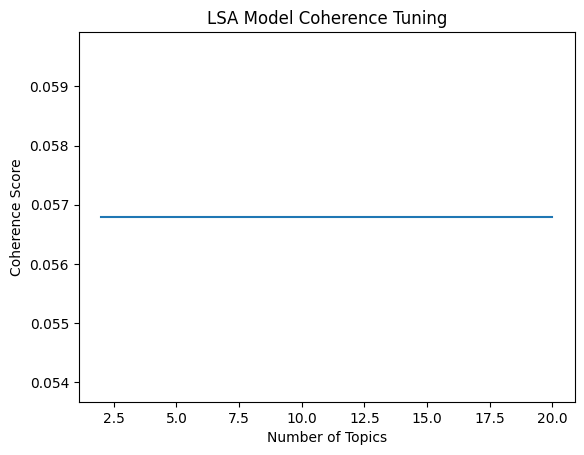

Number of topics with highest coherence (LSA): 2
Highest coherence score (LSA): 0.05679307505488396


In [20]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_punctuation, strip_multiple_whitespaces
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess
from gensim.corpora import dictionary
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.matutils import corpus2dense
from sklearn.metrics.pairwise import cosine_similarity




# Convert the documents to a document-term matrix
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2, token_pattern=r'\b\w+\b')
dtm = vectorizer.fit_transform(df_final['clean_questions'].apply(lambda x: ' '.join(x)))

# Find the optimal number of topics using LSA
coherence_scores_lsa = []
for num_topics in range(2, 21):
    lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
    lsa_topic_matrix = lsa_model.fit_transform(dtm)

    # Create a dictionary and corpus for coherence calculation
    dictionary_lsa = Dictionary(df_final['clean_questions'])
    corpus_lsa = [dictionary_lsa.doc2bow(doc) for doc in df_final['clean_questions']]

    # Convert LSA topic matrix to a format compatible with Gensim CoherenceModel
    topics = [
        [(f"word_{i}", weight) for i, weight in enumerate(topic)]
        for topic in lsa_topic_matrix
    ]

    # Calculate pairwise cosine similarity between topics
    topic_matrix_dense = corpus2dense(corpus_lsa, num_terms=len(dictionary_lsa))
    similarity_matrix = cosine_similarity(topic_matrix_dense.T)

    # Calculate coherence using pairwise cosine similarity
    coherence_values = []
    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            coherence_values.append(similarity_matrix[i, j])

    coherence_score = np.mean(coherence_values)

    coherence_scores_lsa.append(coherence_score)

# Plot coherence scores for different numbers of topics
plt.plot(range(2, 21), coherence_scores_lsa)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LSA Model Coherence Tuning")
plt.show()

# Find the optimal number of topics for LSA
optimal_num_topics_lsa = range(2, 21)[np.argmax(coherence_scores_lsa)]
print(f"Number of topics with highest coherence (LSA): {optimal_num_topics_lsa}")
print(f"Highest coherence score (LSA): {max(coherence_scores_lsa)}")



NMF Topic model:

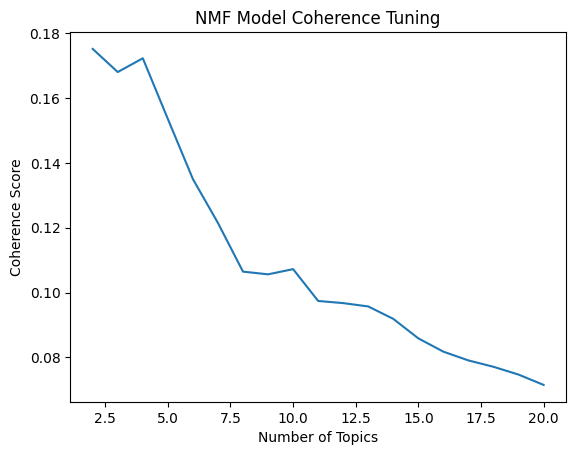

Number of topics with highest coherence (NMF): 2
Highest coherence score (NMF): 0.17517727645914757


In [21]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_punctuation, strip_multiple_whitespaces
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from sklearn.metrics.pairwise import cosine_similarity


# Convert the documents to a document-term matrix
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2, token_pattern=r'\b\w+\b')
dtm = vectorizer.fit_transform(df_final['clean_questions'].apply(lambda x: ' '.join(x)))

# Find the optimal number of topics using NMF
coherence_scores_nmf = []
for num_topics in range(2, 21):
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_topic_matrix = nmf_model.fit_transform(dtm)

    # Calculate pairwise cosine similarity between topics
    similarity_matrix = cosine_similarity(nmf_topic_matrix.T)

    # Calculate coherence using pairwise cosine similarity
    coherence_values = []
    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            coherence_values.append(similarity_matrix[i, j])

    coherence_score = np.mean(coherence_values)

    coherence_scores_nmf.append(coherence_score)

# Plot coherence scores for different numbers of topics
plt.plot(range(2, 21), coherence_scores_nmf)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("NMF Model Coherence Tuning")
plt.show()

# Find the optimal number of topics for NMF
optimal_num_topics_nmf = range(2, 21)[np.argmax(coherence_scores_nmf)]
print(f"Number of topics with highest coherence (NMF): {optimal_num_topics_nmf}")
print(f"Highest coherence score (NMF): {max(coherence_scores_nmf)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


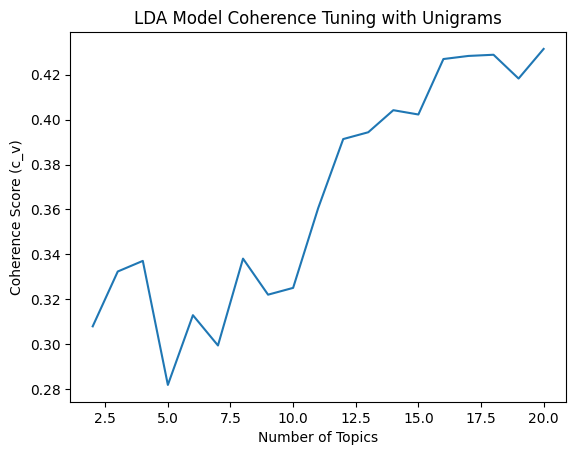

In [22]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_punctuation, strip_multiple_whitespaces
from nltk.stem import WordNetLemmatizer
from gensim.parsing.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec, Phrases
import string
import nltk
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


# Create a dictionary for unigrams
dictionary_unigrams = Dictionary(df_final['clean_questions'])

# Use only unigrams dictionary and corpus
df_final['clean_questions_unigrams'] = df_final['clean_questions']
corpus_unigrams = [dictionary_unigrams.doc2bow(doc) for doc in df_final['clean_questions_unigrams']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df_final['clean_questions_unigrams'], vector_size=300, window=5, min_count=1, workers=4)

# Fine-tune LDA hyperparameters
coherence_scores_lda_1 = []
for num_topics in range(2, 21):
    lda_model = LdaModel(
        corpus_unigrams,
        num_topics=num_topics,
        id2word=dictionary_unigrams,
        passes=20,
        alpha=0.01,
        eta=0.01,
        iterations=100,
        chunksize=200,
        minimum_probability=0.05
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=df_final['clean_questions_unigrams'],
        dictionary=dictionary_unigrams,
        coherence='c_v'
    )
    coherence_scores_lda_1.append(coherence_model.get_coherence())

# Plot coherence scores for different numbers of topics
plt.plot(range(2, 21), coherence_scores_lda_1)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("LDA Model Coherence Tuning with Unigrams")
plt.show()

In [23]:
#LDA Model with unigrams

# Find the optimal number of topics
optimal_num_topics_lda_1 = range(2, 31)[coherence_scores_lda_1.index(max(coherence_scores_lda_1))]
print(f"Optimal number of topics: {optimal_num_topics_lda_1}")



Optimal number of topics: 20


USING BIGRAMS AND TRIGRAMS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


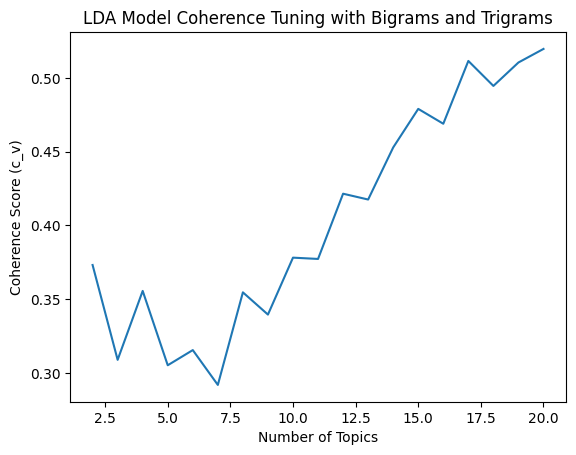

In [24]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_punctuation, strip_multiple_whitespaces
from nltk.stem import WordNetLemmatizer
from gensim.parsing.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec, Phrases
import string
import nltk
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')



# Create bigrams and trigrams
bigram = Phrases(df_final['clean_questions'], min_count=5, threshold=50)
trigram = Phrases(bigram[df_final['clean_questions']], min_count=5, threshold=50)

df_final['clean_questions_bigrams'] = list(bigram[df_final['clean_questions']])
df_final['clean_questions_trigrams'] = list(trigram[bigram[df_final['clean_questions']]])

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df_final['clean_questions_trigrams'], vector_size=300, window=5, min_count=1, workers=4)

# Create dictionary and corpus
dictionary = Dictionary(df_final['clean_questions_trigrams'])
corpus = [dictionary.doc2bow(doc) for doc in df_final['clean_questions_trigrams']]

# Fine-tune LDA hyperparameters
coherence_scores_lda_2 = []
for num_topics in range(2, 21):
    lda_model = LdaModel(
        corpus,
        num_topics=num_topics,
        id2word=dictionary,
        passes=20,
        alpha=0.01,
        eta=0.01,
        iterations=100,
        chunksize=200,
        minimum_probability=0.05
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=df_final['clean_questions_trigrams'],
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores_lda_2.append(coherence_model.get_coherence())

# Plot coherence scores for different numbers of topics
plt.plot(range(2, 21), coherence_scores_lda_2)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("LDA Model Coherence Tuning with Bigrams and Trigrams")
plt.show()

In [25]:
print(f"Highest coherence score: {max(coherence_scores_lda_2)}")

Highest coherence score: 0.5198036828692587


In [26]:
#LDA Model

# Find the optimal number of topics
optimal_num_topics_lda_2 = range(2, 21)[coherence_scores_lda_2.index(max(coherence_scores_lda_2))]
print(f"Optimal number of topics: {optimal_num_topics_lda_2}")




Optimal number of topics: 20


After using 3 Techniques of LDA,LSA and NMF we found out that ideal topic modeling tool is LDA with highest coherent score of above 0.4

But 20 topics are too much and as the graph suggests its overfitting, trying out various other approaches

Increasing threshold of bigrams and trigrams, we have found the coherent scores are decreased. As such decresing the threshold

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


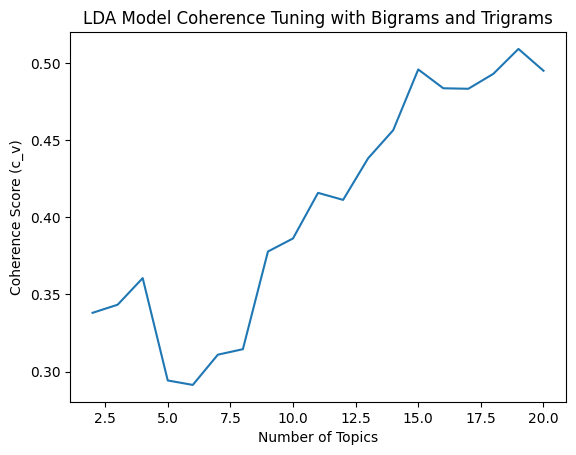

In [27]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_punctuation, strip_multiple_whitespaces
from nltk.stem import WordNetLemmatizer
from gensim.parsing.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec, Phrases
import string
import nltk
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


# Create bigrams and trigrams with adjusted thresholds
bigram = Phrases(df_final['clean_questions'], min_count=5, threshold=30)
trigram = Phrases(bigram[df_final['clean_questions']], min_count=5, threshold=30)

df_final['clean_questions_bigrams'] = list(bigram[df_final['clean_questions']])
df_final['clean_questions_trigrams'] = list(trigram[bigram[df_final['clean_questions']]])

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df_final['clean_questions_trigrams'], vector_size=300, window=5, min_count=1, workers=4)

# Create dictionary and corpus
dictionary = Dictionary(df_final['clean_questions_trigrams'])
corpus = [dictionary.doc2bow(doc) for doc in df_final['clean_questions_trigrams']]

# Fine-tune LDA hyperparameters
coherence_scores_lda_3 = []
for num_topics in range(2, 21):
    lda_model = LdaModel(
        corpus,
        num_topics=num_topics,
        id2word=dictionary,
        passes=20,
        alpha=0.01,
        eta=0.01,
        iterations=100,
        chunksize=200,
        minimum_probability=0.05
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=df_final['clean_questions_trigrams'],
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores_lda_3.append(coherence_model.get_coherence())

# Plot coherence scores for different numbers of topics
plt.plot(range(2, 21), coherence_scores_lda_3)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("LDA Model Coherence Tuning with Bigrams and Trigrams")
plt.show()

In [28]:
print(f"Highest coherence score: {max(coherence_scores_lda_3)}")

Highest coherence score: 0.5093174402018462


In both the graphs we can see a spike on Coherence graps at 15 topics

In [29]:
#LDA Model
# Find the optimal number of topics
optimal_num_topics_lda_3 = range(2, 21)[coherence_scores_lda_3.index(max(coherence_scores_lda_3))]
print(f"Optimal number of topics: {optimal_num_topics_lda_3}")




Optimal number of topics: 19


Coherence score decreased when threshold is increased, as such reverting the value to less
More over the number of topics remain same

From above observations Unigrams also are porducing less amount of coherent scores


Selecting the ideal number of topics in topic modeling is often subjective and depends on various factors. In our case, choosing 15 topics where the coherence score spiked suggests a point where the model provides a better balance between capturing meaningful topics and avoiding overfitting. The spike in coherence indicates improved interpretability of topics. However, it's essential to consider other factors such as domain knowledge, application requirements, and the coherence trend across different topic numbers. Experimentation and sensitivity analysis can help validate the optimal choice for a more robust model.

In [31]:
optimal_num_topics_lda_final = 15

optimal_num_topics_lda_final of 15 has the optimal coherent score above 0.5

In [32]:
# Assuming you've already created the 'corpus' and 'dictionary' objects

# Build the LDA model with the optimal number of topics
lda_model = LdaModel(corpus, num_topics=optimal_num_topics_lda_final, id2word=dictionary, passes=15)



Topic: 0 
Words: 0.111*"canada" + 0.062*"tax" + 0.055*"canadian" + 0.032*"year" + 0.032*"company" + 0.028*"work" + 0.028*"earn" + 0.028*"resident" + 0.023*"mean" + 0.022*"eligible"

Topic: 1 
Words: 0.258*"income" + 0.050*"foreign" + 0.046*"taxable" + 0.036*"consider" + 0.033*"question" + 0.028*"deduct" + 0.024*"split" + 0.022*"earn" + 0.021*"investment" + 0.020*"pension"

Topic: 2 
Words: 0.190*"claim" + 0.091*"work" + 0.080*"home" + 0.054*"expense" + 0.045*"fee" + 0.034*"cost" + 0.023*"mortgage" + 0.020*"tax" + 0.017*"parent" + 0.017*"transfer"

Topic: 3 
Words: 0.258*"file" + 0.176*"tax" + 0.051*"need" + 0.044*"return" + 0.029*"line" + 0.025*"box" + 0.021*"enter" + 0.019*"happen" + 0.019*"year" + 0.019*"information"

Topic: 4 
Words: 0.107*"report" + 0.103*"return" + 0.091*"form" + 0.064*"tax" + 0.059*"income" + 0.034*"example" + 0.032*"include" + 0.032*"need" + 0.026*"total" + 0.024*"list"

Topic: 5 
Words: 0.153*"year" + 0.090*"benefit" + 0.050*"self_employ" + 0.043*"tax" + 0.025*

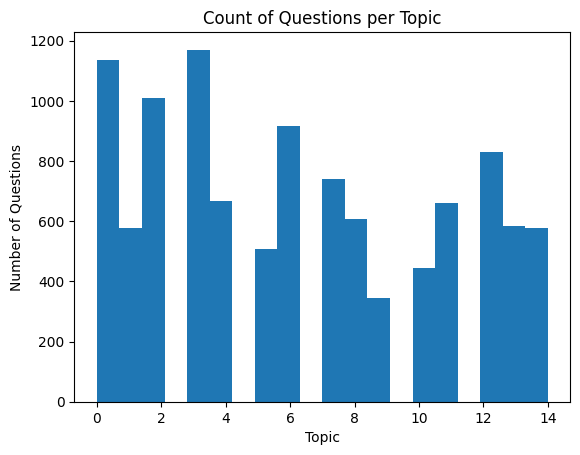

In [33]:
# Print the identified topics and their top words from the LDA model
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

# Assign topics to questions based on the highest probability topic
topics = [sorted(lda_model[doc], key=lambda x: -x[1])[0][0] for doc in corpus]
df_final['topic'] = topics

# Count of questions per topic
plt.hist(topics, bins=num_topics)
plt.title("Count of Questions per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Questions")
plt.show()

In [34]:
# Get the topic distributions for each document
document_topic_distributions = []

for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc)
    # Convert the topics for this document into a list
    topic_distribution = [0] * lda_model.num_topics  # Initialize a list of zeros for each topic
    for topic, prob in doc_topics:
        topic_distribution[topic] = prob
    document_topic_distributions.append(topic_distribution)

# Convert the document-topic distributions to a numpy array
doc_topic_matrix = np.array(document_topic_distributions)

# Now, we can proceed with clustering using doc_topic_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

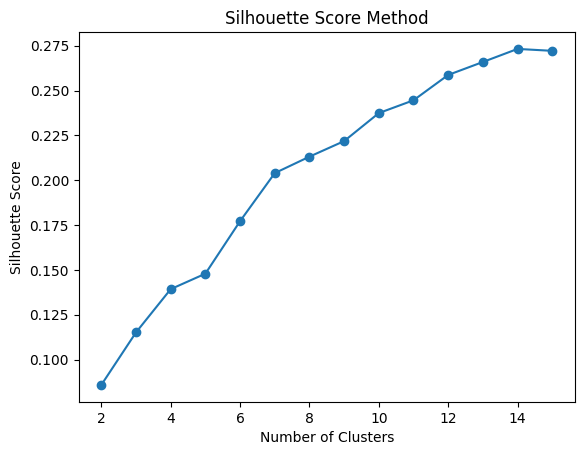

In [35]:
#Using Silhouette model to get ideal number of clusters

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max_clusters = 15

# Silhouette Score
silhouette_scores = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(doc_topic_matrix)
    silhouette_scores.append(silhouette_score(doc_topic_matrix, labels))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

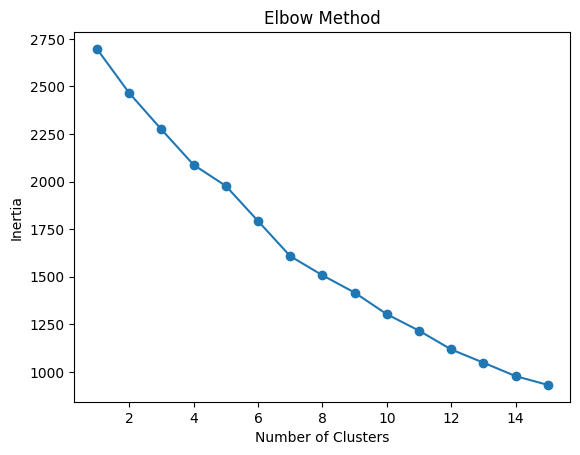

In [36]:
#Using Elbow Method,

inertias = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(doc_topic_matrix)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In both methods we can see at Number of cluster => 7 has a steep change

---

increase in Sihoulette curve and steep decline on elbow method

In [37]:
#KNN using 7 clusters,

from sklearn.cluster import KMeans


# Convert the document-topic distributions to a numpy array
doc_topic_matrix = np.array(document_topic_distributions)

# Perform K-means clustering on the document-topic distributions
num_clusters = 7  # Number of clusters (based on the number of topics)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(doc_topic_matrix)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
print(clusters)

[1 1 0 ... 2 3 5]


In [39]:
# Suppose you have obtained the cluster labels from K-means clustering
# 'clusters' variable represents the cluster labels

# Assuming 'df' is your DataFrame containing the documents
df_final['cluster_label'] = clusters  # Assign the cluster labels to the DataFrame


In [40]:
df_final.head()

,questionTax,answerTax,clean_questions,clean_questions_unigrams,clean_questions_bigrams,clean_questions_trigrams,topic,cluster_label
2,I died in 2021,"I'm sorry to hear that. In this case, your fil...",[die],[die],[die],[die],13,1
3,How to fine as sole proprietor,"As a sole proprietor in Canada, you are requir...","[fine, sole, proprietor]","[fine, sole, proprietor]","[fine, sole_proprietor]","[fine, sole_proprietor]",10,1
6,who is eligible for care giver benefits\n,If you live in Canada and are a caregiver for ...,"[eligible, care, giver, benefit]","[eligible, care, giver, benefit]","[eligible, care, giver, benefit]","[eligible, care, giver, benefit]",0,0
7,Where to claim self employment ink?,"As a self-employed individual in Canada, you c...","[claim, self, employment, ink]","[claim, self, employment, ink]","[claim, self_employment, ink]","[claim, self_employment, ink]",1,1
9,Can I write off hookers?\n,"No, you cannot write off the expenses for ille...","[write, hookers]","[write, hookers]","[write, hookers]","[write, hookers]",9,1


In [41]:
df_final[df_final['cluster_label'] == 3]

,questionTax,answerTax,clean_questions,clean_questions_unigrams,clean_questions_bigrams,clean_questions_trigrams,topic,cluster_label
27,How do I file a section 85 rollover,"If you want to file a Section 85 rollover, you...","[file, section, rollover]","[file, section, rollover]","[file, section, rollover]","[file, section, rollover]",13,3
42,What changes when you are separated?,"When separating from your spouse or partner, t...","[change, separate]","[change, separate]","[change, separate]","[change, separate]",14,3
45,What are taxes?\n,Taxes are mandatory payments that individuals ...,[tax],[tax],[tax],[tax],6,3
52,I want to know how to file tax for a rental pr...,"If you're renting out a property in Canada, yo...","[want, know, file, tax, rental, property]","[want, know, file, tax, rental, property]","[want_know, file, tax, rental, property]","[want_know, file, tax, rental, property]",13,3
71,Late filing,If you are filing your taxes after the deadlin...,"[late, file]","[late, file]","[late, file]","[late, file]",3,3
...,...,...,...,...,...,...,...,...
10444,what is the penalty for filing late?,"If you file your taxes late, you may face pena...","[penalty, file, late]","[penalty, file, late]","[penalty, file, late]","[penalty, file, late]",3,3
10475,Comment mon information fiscale reste confiden...,"En tant que résident canadien, votre informati...","[comment, mon, information, fiscale, reste, co...","[comment, mon, information, fiscale, reste, co...","[comment, mon, information, fiscale, reste, co...","[comment, mon, information, fiscale, reste, co...",3,3
10719,What date and time do I have to electronically...,"For the 2022 tax year, the deadline for most i...","[date, time, electronically, file, income, tax...","[date, time, electronically, file, income, tax...","[date, time, electronically, file, income, tax...","[date, time, electronically, file, income, tax...",3,3
10758,How do I file my taxes?,"To file your taxes in Canada, you will need to...","[file, tax]","[file, tax]","[file, tax]","[file, tax]",3,3


In [42]:
print(doc_topic_matrix)

[[0.03333417 0.03333417 0.03333417 ... 0.03333417 0.53332156 0.03333417]
 [0.02223041 0.02223041 0.02223041 ... 0.02223041 0.02223041 0.02223041]
 [0.35002789 0.01333538 0.01333539 ... 0.27658346 0.01333538 0.01333538]
 ...
 [0.02222298 0.02222298 0.02222298 ... 0.35556677 0.02222298 0.02222298]
 [0.01333341 0.01333341 0.01333341 ... 0.01333342 0.45649028 0.01333341]
 [0.         0.11850999 0.34074727 ... 0.         0.         0.10021824]]


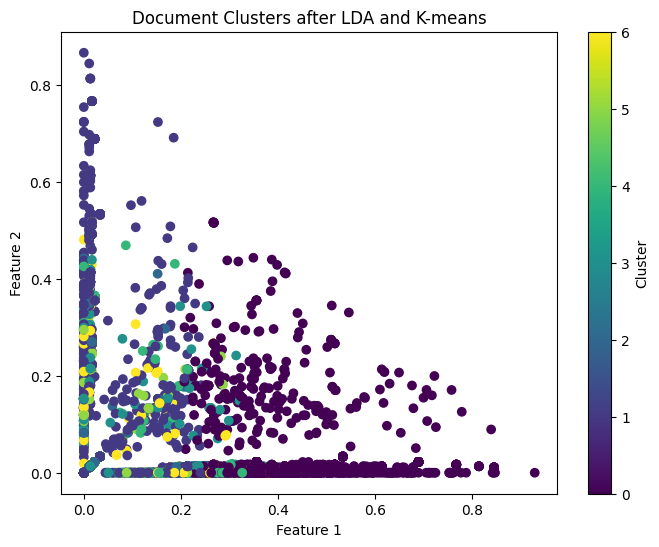

In [43]:
# Plot clusters in the original feature space (if the feature space is more than 2D, this won't be a 2D plot)
plt.figure(figsize=(8, 6))

# Plot clusters based on a specific dimension (e.g., the first two dimensions)
plt.scatter(doc_topic_matrix[:, 0], doc_topic_matrix[:, 1], c=clusters, cmap='viridis')
plt.title('Document Clusters after LDA and K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

To evaluate this KNN model, we would need "truth labels"
In the context of machine learning, "truth labels" or "ground truth labels" refer to the known and correct outcomes or classifications associated with a set of data points. Ground truth labels serve as a reference against which the predictions or results of a machine learning model can be compared. These labels are typically provided by human experts, external sources, or through some established criteria.

In supervised learning scenarios, the dataset is labeled with ground truth information, indicating the correct class or category for each example. For example, in a classification task, the ground truth labels would be the actual classes assigned to each data point.

In unsupervised learning or clustering scenarios, where the goal is to discover patterns or groupings within the data, ground truth labels may not be available. In such cases, internal metrics or domain-specific criteria are often used to evaluate the quality of the clusters.

Having ground truth labels is crucial for assessing the performance and accuracy of machine learning models, especially in supervised learning tasks where the model is trained to make predictions based on labeled examples. However, not all machine learning tasks have access to ground truth labels, and in such cases, alternative evaluation methods are employed.

Checking Other methods to evaluate Clusters

In [45]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(doc_topic_matrix, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.20397734005044563



A Silhouette Score of 0.2039 indicates a moderate level of separation between the clusters. The score ranges from -1 to 1, where higher values indicate better-defined clusters. A score around 0.2 suggests that the clusters are reasonably well-separated. However, it's essential to interpret the Silhouette Score in conjunction with other evaluation metrics and domain knowledge.

In [46]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(doc_topic_matrix, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.7309179954643914


The Davies-Bouldin Index of 1.7309 suggests a moderate level of cluster compactness and separation. This index measures the average similarity-to-dissimilarity ratio between each cluster and its most similar cluster. A lower Davies-Bouldin Index generally indicates better clustering, with values closer to 0 representing well-separated and compact clusters. While 1.7309 is not extremely low, it's important to consider this result in combination with other metrics and domain knowledge to assess the effectiveness of the clustering algorithm for your specific dataset and goals.

In [47]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(doc_topic_matrix, clusters)
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 1214.7086029551513


The Calinski-Harabasz Index is a measure of cluster validity that assesses the quality of clustering based on the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz Index suggests better-defined and more separated clusters.

In your case, a Calinski-Harabasz Index value of 1214.7086 indicates a relatively high separation between clusters. The interpretation of the index depends on the specific dataset and problem context, but a larger index is generally considered indicative of better clustering.

It's important to note that while the Calinski-Harabasz Index provides a numerical measure of clustering quality, it should be interpreted in conjunction with other metrics and, if possible, validated through visual inspection of the clusters and consideration of domain-specific knowledge. Additionally, the interpretation of the index may vary depending on the scale and nature of your data.